In [26]:
import torch
from torchvision import datasets
import os 
import shutil 
from PIL import Image
from matplotlib import pyplot as plt
import string 


In [104]:
# family_genus_species
botanic_names = {'pepper': 'Solanaceae_Capsicum_',
                'tomato': 'Solanaceae_Solanum_lycopersicum',
                 'kohlrabi': 'Brassicaceae_Brassica_', # not really similar to arctic one
                 'frisee': 'Asteraceae_Lactuca_', # wild, need Lactuca_sativa
                 'lactúca': 'Asteraceae_Lactuca_', 
                 'lettuce oakleaf': 'Asteraceae_Lactuca_',
                 'radish': 'Brassicaceae_Raphanus_raphanistrum', 
                 'basil': 'Lamiaceae_Perilla', # family, no genus
                 'cilantro': 'Apiaceae_Daucus', # family, no genus
                 'cress': 'Brassicaceae_Lepidium_',
                 'mint': 'Lamiaceae_Lamium_',
                 'chard': 'Amaranthaceae_Beta_vulgaris', # like beetroot
                 'brassica': 'Brassicaceae_Brassica_', # cabbage
                 'chives': 'Amaryllidaceae_Allium_schoenoprasum', # garlic, with flowers often
                 'parsley': 'Apiaceae_Osmorhiza' # family, no genus                
                }
arctic_inat = {}

In [100]:
root = ''
arctic_name = 'basil'
botanic_names[arctic_name] = 'Lamiaceae_Perilla'

for folder in os.listdir(root):
    if botanic_names[arctic_name] in folder:
        print(folder)
        arctic_inat[arctic_name] = folder

02694_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lamiaceae_Perilla_frutescens


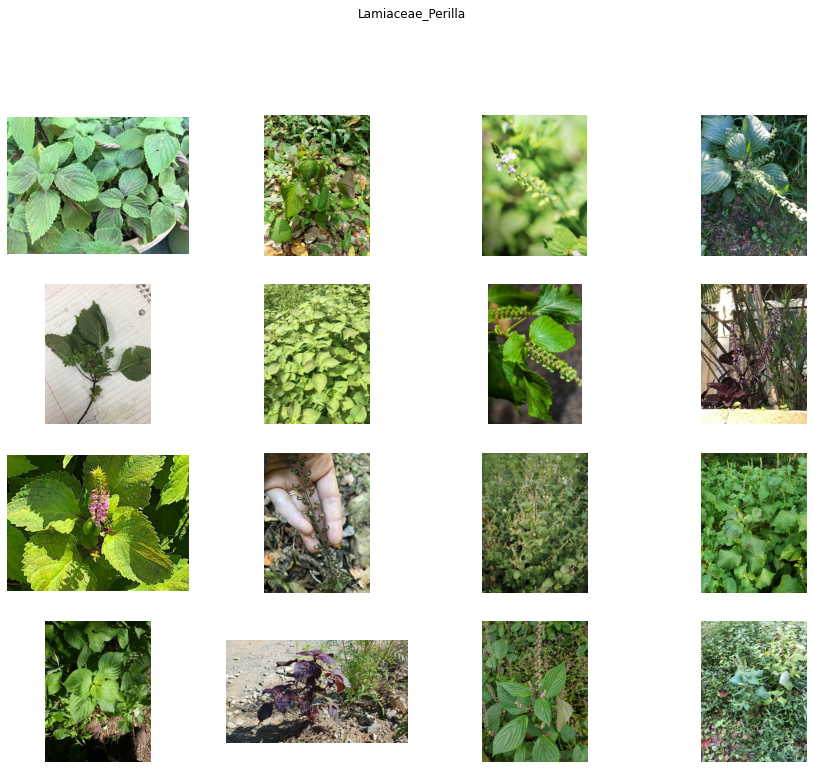

In [101]:
# plots
imgs = [Image.open(os.path.join(root, arctic_inat[arctic_name], path)) 
        for path in os.listdir(os.path.join(root, arctic_inat[arctic_name]))[:16]]

ncols = 4
fig = plt.figure(figsize = (15, 15))
st = fig.suptitle(f"{botanic_names[arctic_name]}")
for i, img in enumerate(imgs):
    ax = plt.subplot(len(imgs) // ncols + 1, ncols, i + 1)
    ax.axis('off')
    plt.imshow(img)
plt.show()

In [44]:
# ! pip install --upgrade torch torchvision --user

In [48]:
# choose folders with plants 
old_root = 'data/train_mini' 
new_root = 'data/plants' 
for folder in os.listdir(old_root): 
    if '_Plantae_' in folder: 
        shutil.move(os.path.join(old_root, folder), os.path.join(new_root, folder))     

In [110]:
# choose folders with plants similar to arctic dataset
arctic_genuses = []
for cat in botanic_names.values():
    arctic_genuses.append('_'.join(cat.split('_')[:2]))

old_root = 'data/plants' 
new_root = 'data/arctic_genus' 
for cat in arctic_genuses:
    for folder in os.listdir(old_root): 
        if cat in folder: 
            shutil.move(os.path.join(old_root, folder), os.path.join(new_root, folder))

number = 0
for folder in os.listdir(new_root): 
    words = folder.split('_')
    words[0] = f'{number:05d}'
    new_folder = '_'.join(words)
    os.rename(os.path.join(new_root, folder), os.path.join(new_root, new_folder))
    number += 1

In [115]:
inaturalist_root = 'data/2021_train_mini' 
os.rename(new_root, inaturalist_root) # to load as torchvicion dataset  

dataset = datasets.INaturalist(root='data', version='2021_train_mini', target_type='class', download=False)

categories = dataset.categories_index

In [118]:
categories.keys()

dict_keys(['kingdom', 'phylum', 'class', 'order', 'family', 'genus'])

In [119]:
sorted(categories['genus'].keys())

['Allium',
 'Beta',
 'Brassica',
 'Capsicum',
 'Daucus',
 'Lactuca',
 'Lamium',
 'Lepidium',
 'Osmorhiza',
 'Perilla',
 'Raphanus',
 'Solanum']

In [96]:
arctic_inat

{'pepper': '03932_Plantae_Tracheophyta_Magnoliopsida_Solanales_Solanaceae_Capsicum_annuum',
 'tomato': '03961_Plantae_Tracheophyta_Magnoliopsida_Solanales_Solanaceae_Solanum_lycopersicum',
 'kohlrabi': '01440_Plantae_Tracheophyta_Magnoliopsida_Brassicales_Brassicaceae_Brassica_rapa',
 'frisee': '01078_Plantae_Tracheophyta_Magnoliopsida_Asterales_Asteraceae_Lactuca_biennis',
 'lactúca': '01082_Plantae_Tracheophyta_Magnoliopsida_Asterales_Asteraceae_Lactuca_tatarica',
 'radish': '01486_Plantae_Tracheophyta_Magnoliopsida_Brassicales_Brassicaceae_Raphanus_raphanistrum',
 'basil': '02747_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lamiaceae_Warnockia_scutellarioides',
 'cilantro': '00764_Plantae_Tracheophyta_Magnoliopsida_Apiales_Apiaceae_Zizia_aurea',
 'cress': '01480_Plantae_Tracheophyta_Magnoliopsida_Brassicales_Brassicaceae_Lepidium_virginicum',
 'mint': '02667_Plantae_Tracheophyta_Magnoliopsida_Lamiales_Lamiaceae_Lamium_purpureum',
 'chard': '01541_Plantae_Tracheophyta_Magnoliopsida_Ca